In [1]:
import numpy as np
import pandas as pd

my_data= np.array([[1,2,3,4],[5,6,7,8],[9,10,11,13]])
my_cols= ['Eleanor', 'Chidi', 'Tahani', 'Jason']
my_DataFrame = pd.DataFrame(data=my_data, columns=my_cols)

#Print entire DF
print(my_DataFrame)

#Print first cell of Eleanor column 
print("Value of cell of row #1")
print(my_DataFrame['Eleanor'][1], '\n')

#Create new col

my_DataFrame["Janet"]= my_DataFrame["Tahani"]+my_DataFrame["Jason"]
#Print entire DF
print(my_DataFrame)

   Eleanor  Chidi  Tahani  Jason
0        1      2       3      4
1        5      6       7      8
2        9     10      11     13
Value of cell of row #1
5 

   Eleanor  Chidi  Tahani  Jason  Janet
0        1      2       3      4      7
1        5      6       7      8     15
2        9     10      11     13     24


In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [11]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


# Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:

a plot of the feature values vs. the label values, and a line showing the output of the trained model

In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    #Label the axes
    
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Plot the feature values vs. label values.
    plt.scatter(feature,label)
    
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0,x1], [y0,y1], c='r')
    
    # Render the scatter plot and the red line.
    plt.show()
    
def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")


    
    

Defined the plot_the_model and plot_the_loss_curve functions.


# Define the Datasets

In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Specify the hyper parameters

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 1s 46ms/sample - loss: 1276.7047 - root_mean_squared_error: 35.7310
Epoch 2/10
12/12 [==============================] - 0s 1ms/sample - loss: 1258.1290 - root_mean_squared_error: 35.4701
Epoch 3/10
12/12 [==============================] - 0s 846us/sample - loss: 1244.7845 - root_mean_squared_error: 35.2815
Epoch 4/10
12/12 [==============================] - 0s 1ms/sample - loss: 1233.6890 - root_mean_squared_error: 35.1239
Epoch 5/10
12/12 [==============================] - 0s 766us/sample - loss: 1223.8965 - root_mean_squared_error: 34.9842
Epoch 6/10
12/12 [==============================] - 0s 681us/sample - loss: 1214.9684 - root_mean_squared_error: 34.8564
Epoch 7/10
12/12 [==============================] - 0s 752us/sample - loss: 1206.6608 - root_mean_squared_error: 34.7370
Epoch 8/10
12/12 [==============================] - 0s 854us/sample - loss: 1198.8215 - root_mean_squared_error: 34.6240
Epoch 9/10
12/12 

C:\Users\Negi\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


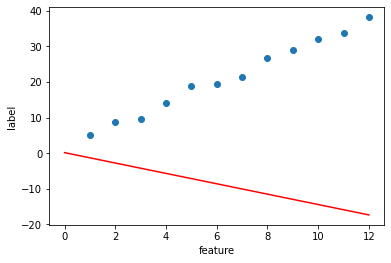

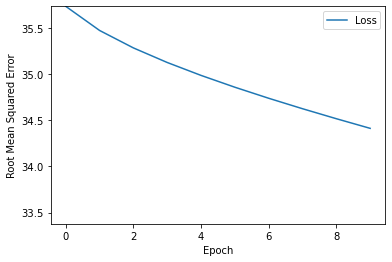

In [12]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Task 1: Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Train on 12 samples
Epoch 1/450
12/12 [==============================] - 1s 50ms/sample - loss: 263.9319 - root_mean_squared_error: 16.2460
Epoch 2/450
12/12 [==============================] - 0s 2ms/sample - loss: 255.5311 - root_mean_squared_error: 15.9853
Epoch 3/450
12/12 [==============================] - 0s 1ms/sample - loss: 249.5680 - root_mean_squared_error: 15.7977
Epoch 4/450
12/12 [==============================] - 0s 979us/sample - loss: 244.6523 - root_mean_squared_error: 15.6414
Epoch 5/450
12/12 [==============================] - 0s 742us/sample - loss: 240.3450 - root_mean_squared_error: 15.5031
Epoch 6/450
12/12 [==============================] - 0s 703us/sample - loss: 236.4431 - root_mean_squared_error: 15.3767
Epoch 7/450
12/12 [==============================] - 0s 1ms/sample - loss: 232.8333 - root_mean_squared_error: 15.2589
Epoch 8/450
12/12 [==============================] - 0s 616us/sample - loss: 229.4458 - root_mean_squared_error: 15.1475
Epoch 9/450
12/12 [

Epoch 69/450
12/12 [==============================] - 0s 989us/sample - loss: 103.4078 - root_mean_squared_error: 10.1690
Epoch 70/450
12/12 [==============================] - 0s 694us/sample - loss: 101.8522 - root_mean_squared_error: 10.0922
Epoch 71/450
12/12 [==============================] - 0s 986us/sample - loss: 100.3094 - root_mean_squared_error: 10.0155
Epoch 72/450
12/12 [==============================] - 0s 1ms/sample - loss: 98.7792 - root_mean_squared_error: 9.9388
Epoch 73/450
12/12 [==============================] - 0s 567us/sample - loss: 97.2618 - root_mean_squared_error: 9.8621
Epoch 74/450
12/12 [==============================] - 0s 736us/sample - loss: 95.7570 - root_mean_squared_error: 9.7856
Epoch 75/450
12/12 [==============================] - 0s 676us/sample - loss: 94.2649 - root_mean_squared_error: 9.7090
Epoch 76/450
12/12 [==============================] - 0s 378us/sample - loss: 92.7855 - root_mean_squared_error: 9.6325
Epoch 77/450
12/12 [================

Epoch 138/450
12/12 [==============================] - 0s 505us/sample - loss: 25.2669 - root_mean_squared_error: 5.0266
Epoch 139/450
12/12 [==============================] - 0s 511us/sample - loss: 24.5585 - root_mean_squared_error: 4.9557
Epoch 140/450
12/12 [==============================] - 0s 807us/sample - loss: 23.8617 - root_mean_squared_error: 4.8848
Epoch 141/450
12/12 [==============================] - 0s 1ms/sample - loss: 23.1766 - root_mean_squared_error: 4.8142
Epoch 142/450
12/12 [==============================] - 0s 1ms/sample - loss: 22.5031 - root_mean_squared_error: 4.7437
Epoch 143/450
12/12 [==============================] - 0s 703us/sample - loss: 21.8412 - root_mean_squared_error: 4.6735
Epoch 144/450
12/12 [==============================] - 0s 2ms/sample - loss: 21.1908 - root_mean_squared_error: 4.6033
Epoch 145/450
12/12 [==============================] - 0s 1ms/sample - loss: 20.5520 - root_mean_squared_error: 4.5334
Epoch 146/450
12/12 [===================

Epoch 207/450
12/12 [==============================] - 0s 795us/sample - loss: 1.2426 - root_mean_squared_error: 1.1147
Epoch 208/450
12/12 [==============================] - 0s 572us/sample - loss: 1.1945 - root_mean_squared_error: 1.0929
Epoch 209/450
12/12 [==============================] - 0s 543us/sample - loss: 1.1512 - root_mean_squared_error: 1.0730
Epoch 210/450
12/12 [==============================] - 0s 1ms/sample - loss: 1.1125 - root_mean_squared_error: 1.0547
Epoch 211/450
12/12 [==============================] - 0s 732us/sample - loss: 1.0780 - root_mean_squared_error: 1.0383
Epoch 212/450
12/12 [==============================] - 0s 1ms/sample - loss: 1.0475 - root_mean_squared_error: 1.0235
Epoch 213/450
12/12 [==============================] - 0s 703us/sample - loss: 1.0207 - root_mean_squared_error: 1.0103
Epoch 214/450
12/12 [==============================] - 0s 530us/sample - loss: 0.9974 - root_mean_squared_error: 0.9987
Epoch 215/450
12/12 [=======================

Epoch 276/450
12/12 [==============================] - 0s 626us/sample - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 277/450
12/12 [==============================] - 0s 726us/sample - loss: 0.8764 - root_mean_squared_error: 0.9362
Epoch 278/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 279/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8762 - root_mean_squared_error: 0.9360
Epoch 280/450
12/12 [==============================] - 0s 878us/sample - loss: 0.8760 - root_mean_squared_error: 0.9360
Epoch 281/450
12/12 [==============================] - 0s 654us/sample - loss: 0.8759 - root_mean_squared_error: 0.9359
Epoch 282/450
12/12 [==============================] - 0s 784us/sample - loss: 0.8758 - root_mean_squared_error: 0.9359
Epoch 283/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 284/450
12/12 [=========================

Epoch 345/450
12/12 [==============================] - 0s 697us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 346/450
12/12 [==============================] - 0s 662us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 347/450
12/12 [==============================] - 0s 775us/sample - loss: 0.8771 - root_mean_squared_error: 0.9365
Epoch 348/450
12/12 [==============================] - 0s 583us/sample - loss: 0.8771 - root_mean_squared_error: 0.9365
Epoch 349/450
12/12 [==============================] - 0s 942us/sample - loss: 0.8771 - root_mean_squared_error: 0.9365
Epoch 350/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 351/450
12/12 [==============================] - 0s 798us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 352/450
12/12 [==============================] - 0s 759us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 353/450
12/12 [=====================

Epoch 414/450
12/12 [==============================] - 0s 846us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 415/450
12/12 [==============================] - 0s 817us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 416/450
12/12 [==============================] - 0s 566us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 417/450
12/12 [==============================] - 0s 855us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 418/450
12/12 [==============================] - 0s 745us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 419/450
12/12 [==============================] - 0s 681us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 420/450
12/12 [==============================] - 0s 707us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 421/450
12/12 [==============================] - 0s 654us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 422/450
12/12 [===================

C:\Users\Negi\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


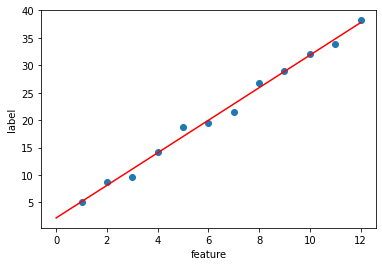

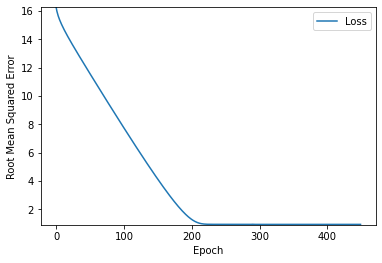

In [13]:
learning_rate=0.01
epochs= 450   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 1s 54ms/sample - loss: 1131.3529 - root_mean_squared_error: 33.6356
Epoch 2/500
12/12 [==============================] - 0s 2ms/sample - loss: 6642290.5000 - root_mean_squared_error: 2577.2642
Epoch 3/500
12/12 [==============================] - 0s 856us/sample - loss: 1117.9513 - root_mean_squared_error: 33.4358
Epoch 4/500
12/12 [==============================] - 0s 966us/sample - loss: 6.7295 - root_mean_squared_error: 2.5941
Epoch 5/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.6567 - root_mean_squared_error: 1.2871
Epoch 6/500
12/12 [==============================] - 0s 735us/sample - loss: 1.5362 - root_mean_squared_error: 1.2394
Epoch 7/500
12/12 [==============================] - 0s 966us/sample - loss: 1.4912 - root_mean_squared_error: 1.2211
Epoch 8/500
12/12 [==============================] - 0s 819us/sample - loss: 1.4493 - root_mean_squared_error: 1.2038
Epoch 9/500
12/12 [=====

Epoch 69/500
12/12 [==============================] - 0s 789us/sample - loss: 232543.0156 - root_mean_squared_error: 482.2271
Epoch 70/500
12/12 [==============================] - 0s 1ms/sample - loss: 171737.0938 - root_mean_squared_error: 414.4117
Epoch 71/500
12/12 [==============================] - 0s 1ms/sample - loss: 130430.5391 - root_mean_squared_error: 361.1517
Epoch 72/500
12/12 [==============================] - 0s 1ms/sample - loss: 106384.9609 - root_mean_squared_error: 326.1671
Epoch 73/500
12/12 [==============================] - 0s 718us/sample - loss: 95185.2812 - root_mean_squared_error: 308.5211
Epoch 74/500
12/12 [==============================] - 0s 949us/sample - loss: 93940.1016 - root_mean_squared_error: 306.4965
Epoch 75/500
12/12 [==============================] - 0s 840us/sample - loss: 101628.4375 - root_mean_squared_error: 318.7921
Epoch 76/500
12/12 [==============================] - 0s 1ms/sample - loss: 118531.5703 - root_mean_squared_error: 344.2841
Ep

12/12 [==============================] - 0s 780us/sample - loss: 173427.5312 - root_mean_squared_error: 416.4463
Epoch 135/500
12/12 [==============================] - 0s 534us/sample - loss: 174064.6875 - root_mean_squared_error: 417.2106
Epoch 136/500
12/12 [==============================] - 0s 455us/sample - loss: 173894.0938 - root_mean_squared_error: 417.0061
Epoch 137/500
12/12 [==============================] - 0s 1ms/sample - loss: 173033.8594 - root_mean_squared_error: 415.9734
Epoch 138/500
12/12 [==============================] - 0s 1ms/sample - loss: 171735.8281 - root_mean_squared_error: 414.4102
Epoch 139/500
12/12 [==============================] - 0s 1ms/sample - loss: 170312.6250 - root_mean_squared_error: 412.6895
Epoch 140/500
12/12 [==============================] - 0s 1ms/sample - loss: 169062.5156 - root_mean_squared_error: 411.1721
Epoch 141/500
12/12 [==============================] - 0s 686us/sample - loss: 168211.9844 - root_mean_squared_error: 410.1365
Epoch 

Epoch 199/500
12/12 [==============================] - 0s 676us/sample - loss: 170341.4375 - root_mean_squared_error: 412.7244
Epoch 200/500
12/12 [==============================] - 0s 926us/sample - loss: 170396.2031 - root_mean_squared_error: 412.7907
Epoch 201/500
12/12 [==============================] - 0s 908us/sample - loss: 170449.8125 - root_mean_squared_error: 412.8557
Epoch 202/500
12/12 [==============================] - 0s 498us/sample - loss: 170491.6406 - root_mean_squared_error: 412.9063
Epoch 203/500
12/12 [==============================] - 0s 623us/sample - loss: 170514.4531 - root_mean_squared_error: 412.9340
Epoch 204/500
12/12 [==============================] - 0s 1ms/sample - loss: 170515.6250 - root_mean_squared_error: 412.9354
Epoch 205/500
12/12 [==============================] - 0s 816us/sample - loss: 170496.9844 - root_mean_squared_error: 412.9128
Epoch 206/500
12/12 [==============================] - 0s 745us/sample - loss: 170464.3906 - root_mean_squared_er

Epoch 264/500
12/12 [==============================] - 0s 540us/sample - loss: 170414.1719 - root_mean_squared_error: 412.8125
Epoch 265/500
12/12 [==============================] - 0s 508us/sample - loss: 170413.7500 - root_mean_squared_error: 412.8120
Epoch 266/500
12/12 [==============================] - 0s 792us/sample - loss: 170414.1250 - root_mean_squared_error: 412.8125
Epoch 267/500
12/12 [==============================] - 0s 590us/sample - loss: 170415.1719 - root_mean_squared_error: 412.8137
Epoch 268/500
12/12 [==============================] - 0s 1ms/sample - loss: 170416.5312 - root_mean_squared_error: 412.8154
Epoch 269/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.9688 - root_mean_squared_error: 412.8171
Epoch 270/500
12/12 [==============================] - 0s 873us/sample - loss: 170419.2812 - root_mean_squared_error: 412.8187
Epoch 271/500
12/12 [==============================] - 0s 501us/sample - loss: 170420.0156 - root_mean_squared_erro

Epoch 329/500
12/12 [==============================] - 0s 596us/sample - loss: 170417.5312 - root_mean_squared_error: 412.8166
Epoch 330/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 331/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 332/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 333/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 334/500
12/12 [==============================] - 0s 643us/sample - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 335/500
12/12 [==============================] - 0s 547us/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 336/500
12/12 [==============================] - 0s 864us/sample - loss: 170417.5000 - root_mean_squared_error: 4

Epoch 394/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 395/500
12/12 [==============================] - 0s 680us/sample - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 396/500
12/12 [==============================] - 0s 558us/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 397/500
12/12 [==============================] - 0s 612us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 398/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 399/500
12/12 [==============================] - 0s 794us/sample - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 400/500
12/12 [==============================] - 0s 934us/sample - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 401/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.6250 - root_mean_squared_error:

Epoch 459/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 460/500
12/12 [==============================] - 0s 646us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 461/500
12/12 [==============================] - 0s 584us/sample - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 462/500
12/12 [==============================] - 0s 747us/sample - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 463/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 464/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 465/500
12/12 [==============================] - 0s 588us/sample - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 466/500
12/12 [==============================] - 0s 819us/sample - loss: 170417.5781 - root_mean_squared_error:

C:\Users\Negi\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


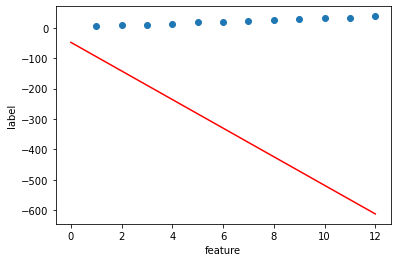

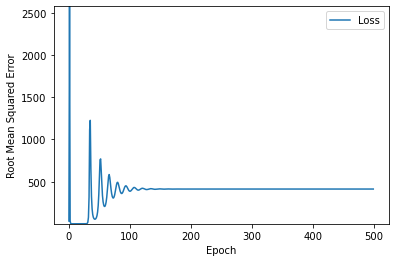

In [14]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 4: Find the ideal combination of epochs and learning rate
Assign values to the following two hyperparameters to make training converge as efficiently as possible:

learning_rate
epochs

Train on 12 samples
Epoch 1/70
12/12 [==============================] - 1s 51ms/sample - loss: 707.2300 - root_mean_squared_error: 26.5938
Epoch 2/70
12/12 [==============================] - 0s 1ms/sample - loss: 526.3311 - root_mean_squared_error: 22.9419
Epoch 3/70
12/12 [==============================] - 0s 625us/sample - loss: 419.6779 - root_mean_squared_error: 20.4860
Epoch 4/70
12/12 [==============================] - 0s 872us/sample - loss: 343.5067 - root_mean_squared_error: 18.5339
Epoch 5/70
12/12 [==============================] - 0s 875us/sample - loss: 284.8154 - root_mean_squared_error: 16.8765
Epoch 6/70
12/12 [==============================] - 0s 641us/sample - loss: 237.7493 - root_mean_squared_error: 15.4191
Epoch 7/70
12/12 [==============================] - 0s 852us/sample - loss: 199.0983 - root_mean_squared_error: 14.1102
Epoch 8/70
12/12 [==============================] - 0s 760us/sample - loss: 166.8806 - root_mean_squared_error: 12.9182
Epoch 9/70
12/12 [=====

C:\Users\Negi\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


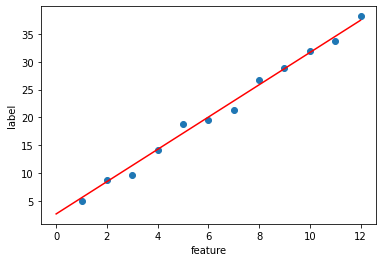

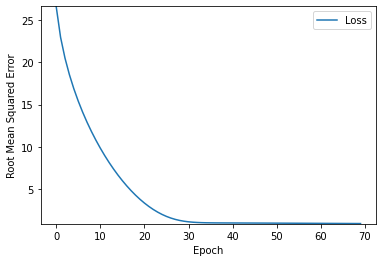

In [15]:
# Set the learning rate and number of epochs
learning_rate= 0.14  # Replace ? with a floating-point number
epochs= 70   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 5: Adjust the batch size
The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

Train on 12 samples
Epoch 1/125
12/12 [==============================] - 1s 58ms/sample - loss: 486.0547 - root_mean_squared_error: 22.0466
Epoch 2/125
12/12 [==============================] - 0s 3ms/sample - loss: 304.3604 - root_mean_squared_error: 17.4459
Epoch 3/125
12/12 [==============================] - 0s 3ms/sample - loss: 196.7029 - root_mean_squared_error: 14.0251
Epoch 4/125
12/12 [==============================] - 0s 3ms/sample - loss: 118.6870 - root_mean_squared_error: 10.8944
Epoch 5/125
12/12 [==============================] - 0s 2ms/sample - loss: 65.0716 - root_mean_squared_error: 8.0667
Epoch 6/125
12/12 [==============================] - 0s 3ms/sample - loss: 28.5939 - root_mean_squared_error: 5.3473
Epoch 7/125
12/12 [==============================] - 0s 4ms/sample - loss: 9.6908 - root_mean_squared_error: 3.1130
Epoch 8/125
12/12 [==============================] - 0s 3ms/sample - loss: 2.9175 - root_mean_squared_error: 1.7081
Epoch 9/125
12/12 [==================

12/12 [==============================] - 0s 4ms/sample - loss: 1.0578 - root_mean_squared_error: 1.0285
Epoch 71/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.3322 - root_mean_squared_error: 1.1542
Epoch 72/125
12/12 [==============================] - 0s 3ms/sample - loss: 1.1655 - root_mean_squared_error: 1.0796
Epoch 73/125
12/12 [==============================] - 0s 3ms/sample - loss: 0.9762 - root_mean_squared_error: 0.9880
Epoch 74/125
12/12 [==============================] - 0s 3ms/sample - loss: 0.9392 - root_mean_squared_error: 0.9691
Epoch 75/125
12/12 [==============================] - 0s 3ms/sample - loss: 0.9892 - root_mean_squared_error: 0.9946
Epoch 76/125
12/12 [==============================] - 0s 3ms/sample - loss: 1.1750 - root_mean_squared_error: 1.0840
Epoch 77/125
12/12 [==============================] - 0s 3ms/sample - loss: 1.2023 - root_mean_squared_error: 1.0965
Epoch 78/125
12/12 [==============================] - 0s 3ms/sample - loss: 1

C:\Users\Negi\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


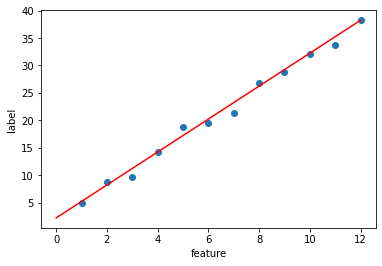

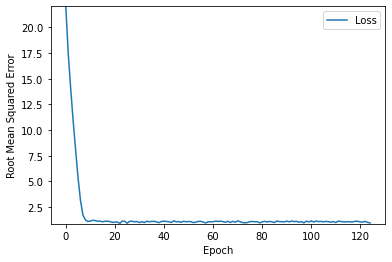

In [16]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Summary of hyperparameter tuning
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
If the training loss does not converge, train for more epochs.
If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.
Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.